# 데이터 설명 및 보기

Students Performance in Exams 데이터를 불러온다.

In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np

file_path = 'StudentsPerformance/StudentsPerformance.csv'

st_data = pd.read_csv(file_path)
st_data.drop(['Unnamed: 0'], axis = 1, inplace = True)

st_data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
st_data_copy_backup = st_data.copy()
st_data.to_csv('StudentsPerformance/StudentsPerformance_backup.csv')

file_path = 'StudentsPerformance/StudentsPerformance_backup.csv'
st_data_csv_backup = pd.read_csv(file_path)
st_data_csv_backup.drop(['Unnamed: 0'], axis = 1, inplace = True)
st_data_csv_backup

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


df 기본정보 출력

In [4]:
st_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


df 기초 통계 확인

- count : 총 데이터 수
- mean : 평균
- std : 표준편차
- min/max : 최소/최대
- 50% : 중앙값

In [5]:
st_data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# 데이터 기초 분석 및 탐색

데이터 재구조화

.map()을 사용하여 데이터프레임의 데이터를 다른 값으로 변경.

ex) df['변경할 열'] = df['변경할 열'].map({'데이터1':1, '데이터2':2})

gender 변수의 male, female -> 0, 1

In [6]:
gender_dict = {'male':0, 'female':1}
st_data['gender'] = st_data['gender'].map(gender_dict)

race/ethnicity 그룹 분석

In [7]:
st_data.groupby(['race/ethnicity']).mean()

,gender,math score,reading score,writing score
race/ethnicity,,,,
group A,0.404494,61.629213,64.674157,62.674157
group B,0.547368,63.452632,67.352632,65.600000
group C,0.564263,64.463950,69.103448,67.827586
group D,0.492366,67.362595,70.030534,70.145038
group E,0.492857,73.821429,73.028571,71.407143


race/ethnicity 변수의 group A, group B, group C, group D, group E -> 0, 1, 2, 3, 4

In [8]:
race_dict = {'group A':0, 'group B':1, 'group C':2, 'group D':3, 'group E':4}
st_data['race/ethnicity'] = st_data['race/ethnicity'].map(race_dict)

parental level of education 그룹 분석

In [9]:
st_data.groupby(['parental level of education']).mean()

,gender,race/ethnicity,math score,reading score,writing score
parental level of education,,,,,
associate's degree,0.522523,2.265766,67.882883,70.927928,69.896396
bachelor's degree,0.533898,2.169492,69.389831,73.000000,73.381356
high school,0.479592,2.020408,62.137755,64.704082,62.448980
master's degree,0.610169,2.457627,69.745763,75.372881,75.677966
some college,0.522124,2.283186,67.128319,69.460177,68.840708
some high school,0.508380,2.000000,63.497207,66.938547,64.888268


parental level of education 변수의 값 변환

- some high school : 0
- high school : 1
- some college : 2
- bachelor's degree : 3
- associate's degree : 4
- master's degree : 5

In [10]:
eduLevel_dict = {'some high school':0, 'high school':1, 'some college':2, 'bachelor\'s degree':3, 'associate\'s degree':4, 'master\'s degree':5}
st_data['parental level of education'] =  st_data['parental level of education'].map(eduLevel_dict)

lunch 그룹 분석

In [11]:
st_data.groupby(['lunch']).mean()

,gender,race/ethnicity,parental level of education,math score,reading score,writing score
lunch,,,,,,
free/reduced,0.532394,2.101408,2.219718,58.921127,64.653521,63.022535
standard,0.510078,2.213953,2.165891,70.034109,71.654264,70.823256


lunch의 free/reduced, standard -> 0, 1

In [12]:
lunch_dict = { 'free/reduced':0, 'standard':1}
st_data['lunch'] = st_data['lunch'].map(lunch_dict)

test preparation course 그룹분석

In [13]:
st_data.groupby(['test preparation course']).mean()

,gender,race/ethnicity,parental level of education,lunch,math score,reading score,writing score
test preparation course,,,,,,,
completed,0.513966,2.201117,2.167598,0.634078,69.695531,73.893855,74.418994
none,0.520249,2.158879,2.194704,0.651090,64.077882,66.534268,64.504673


preparation course의 none, completed -> 0, 1

In [14]:
pre_dict = {'none':0, 'completed':1}
st_data['test preparation course'] =  st_data['test preparation course'].map(pre_dict)

In [15]:
st_data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,1,3,1,0,72,72,74
1,1,2,2,1,1,69,90,88
2,1,1,5,1,0,90,95,93
3,0,0,4,0,0,47,57,44
4,0,2,2,1,0,76,78,75
...,...,...,...,...,...,...,...,...
995,1,4,5,1,1,88,99,95
996,0,2,1,0,0,62,55,55
997,1,2,1,0,1,59,71,65
998,1,3,2,1,1,68,78,77


In [16]:
st_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1000 non-null   int64
 1   race/ethnicity               1000 non-null   int64
 2   parental level of education  1000 non-null   int64
 3   lunch                        1000 non-null   int64
 4   test preparation course      1000 non-null   int64
 5   math score                   1000 non-null   int64
 6   reading score                1000 non-null   int64
 7   writing score                1000 non-null   int64
dtypes: int64(8)
memory usage: 62.6 KB


math score, reading score, writing score의 평균을 낸 컬럼 만들기

In [17]:
st_data['avg_score'] = (st_data['math score'] + st_data['reading score'] + st_data['writing score'])/3  #각각의 시험 점수의 평균값을 avg_score열에 넣는다.

#소수점으로 나온 값을 int형으로 바꿔서 소수점을 없앤다.
st_data['avg_score'] = st_data['avg_score'].astype(int)

In [18]:
st_data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg_score
0,1,1,3,1,0,72,72,74,72
1,1,2,2,1,1,69,90,88,82
2,1,1,5,1,0,90,95,93,92
3,0,0,4,0,0,47,57,44,49
4,0,2,2,1,0,76,78,75,76
...,...,...,...,...,...,...,...,...,...
995,1,4,5,1,1,88,99,95,94
996,0,2,1,0,0,62,55,55,57
997,1,2,1,0,1,59,71,65,65
998,1,3,2,1,1,68,78,77,74


밥을 먹고 시험 준비 과정도 거친 학생이 시험을 잘봄.

밥을 먹고 시험 준비 과정도 거친 학생에 대한 컬럼 만들기

In [19]:
s1 = st_data['lunch']   #lunch열 데이터를 s1에 저장
s2 = st_data['test preparation course']   #test preparation course열 데이터를 s2에 저장
st_data['lap'] = s1 + s2   #s1, s2에 있던 값들을 서로 더한 값을 데이터프레임에 lap열을 생성해 저장
st_data['lap'] = st_data['lap'].replace(1, 0)   #1값을 0으로 변경
st_data['lap'] = st_data['lap'].replace(2, 1)   #2값을 1로 변경
st_data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg_score,lap
0,1,1,3,1,0,72,72,74,72,0
1,1,2,2,1,1,69,90,88,82,1
2,1,1,5,1,0,90,95,93,92,0
3,0,0,4,0,0,47,57,44,49,0
4,0,2,2,1,0,76,78,75,76,0
...,...,...,...,...,...,...,...,...,...,...
995,1,4,5,1,1,88,99,95,94,1
996,0,2,1,0,0,62,55,55,57,0
997,1,2,1,0,1,59,71,65,65,0
998,1,3,2,1,1,68,78,77,74,1


새로 생성한 lap 열을 그룹분석

In [20]:
st_data.groupby(['lap']).mean()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg_score
lap,,,,,,,,,
0,0.522639,2.168176,2.214748,0.54075,0.16947,63.902975,67.099612,65.495472,65.172057
1,0.502203,2.193833,2.083700,1.00000,1.00000,73.533040,76.215859,76.766520,75.185022


컬럼의 공백을 언더바 대체, 이름 간략화

In [21]:
st_data = st_data.rename({'parental level of education':'parent_edu_level', 'test preparation course':'test_prepare', 'math score':'math_score', 'reading score': 'reading_score', 'writing score':'writing_score'}, axis = 'columns')   #열의 이름 수정
st_data

,gender,race/ethnicity,parent_edu_level,lunch,test_prepare,math_score,reading_score,writing_score,avg_score,lap
0,1,1,3,1,0,72,72,74,72,0
1,1,2,2,1,1,69,90,88,82,1
2,1,1,5,1,0,90,95,93,92,0
3,0,0,4,0,0,47,57,44,49,0
4,0,2,2,1,0,76,78,75,76,0
...,...,...,...,...,...,...,...,...,...,...
995,1,4,5,1,1,88,99,95,94,1
996,0,2,1,0,0,62,55,55,57,0
997,1,2,1,0,1,59,71,65,65,0
998,1,3,2,1,1,68,78,77,74,1


# 데이터 클린징

결측치 확인

In [22]:
import missingno as msno

st_data.isnull().sum()

gender              0
race/ethnicity      0
parent_edu_level    0
lunch               0
test_prepare        0
math_score          0
reading_score       0
writing_score       0
avg_score           0
lap                 0
dtype: int64

<AxesSubplot:>

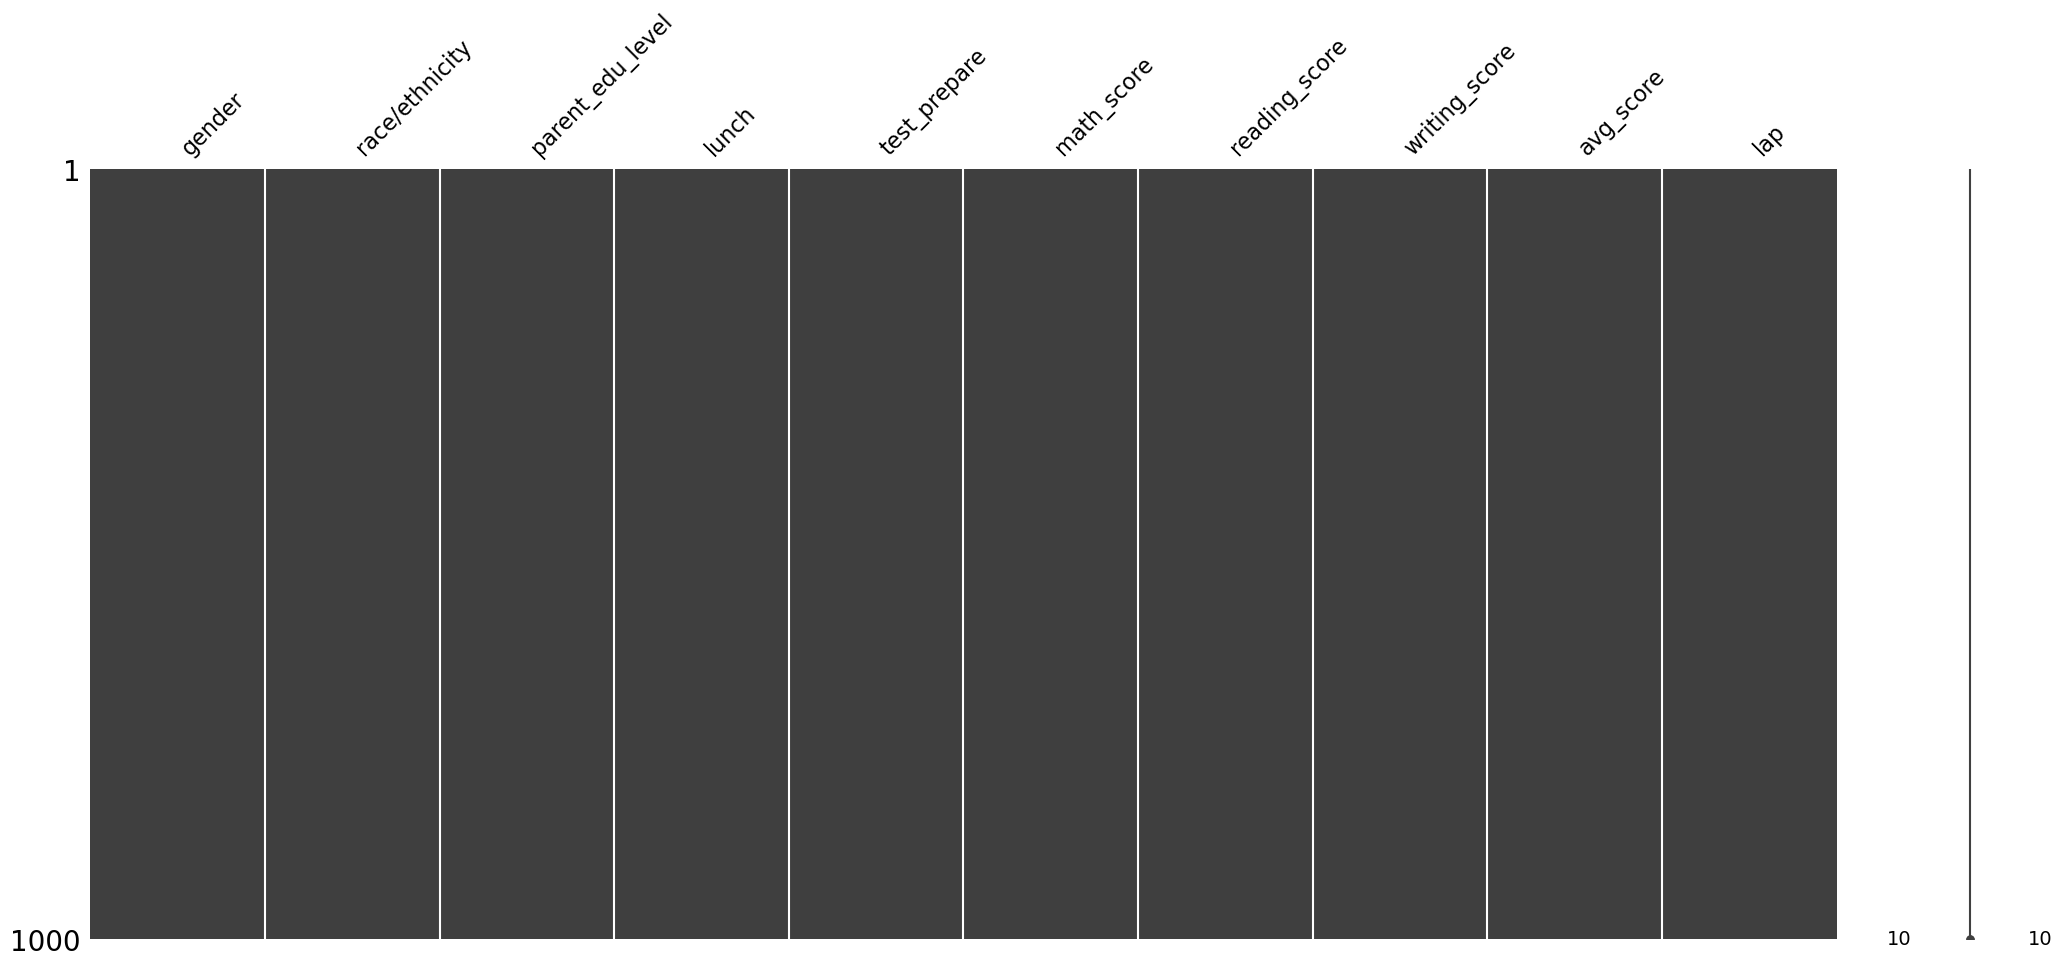

In [23]:
msno.matrix(st_data)

결측치 제거를 한 값을 새 데이터프레임 st_data2를 생성하여 넣음

_결측치 제거를 위해 들어있는 행, 열 전체를 삭제하는 것은 데이터 삭제 또는 데이터 왜곡의 위험성이 있기에, 반드시 원본 데이터를 별도로 백업한 후 작업 진행._

In [24]:
st_data2 = st_data.dropna(axis=0)

In [27]:
st_data2.isnull().sum()

gender              0
race/ethnicity      0
parent_edu_level    0
lunch               0
test_prepare        0
math_score          0
reading_score       0
writing_score       0
avg_score           0
lap                 0
dtype: int64

<AxesSubplot:>

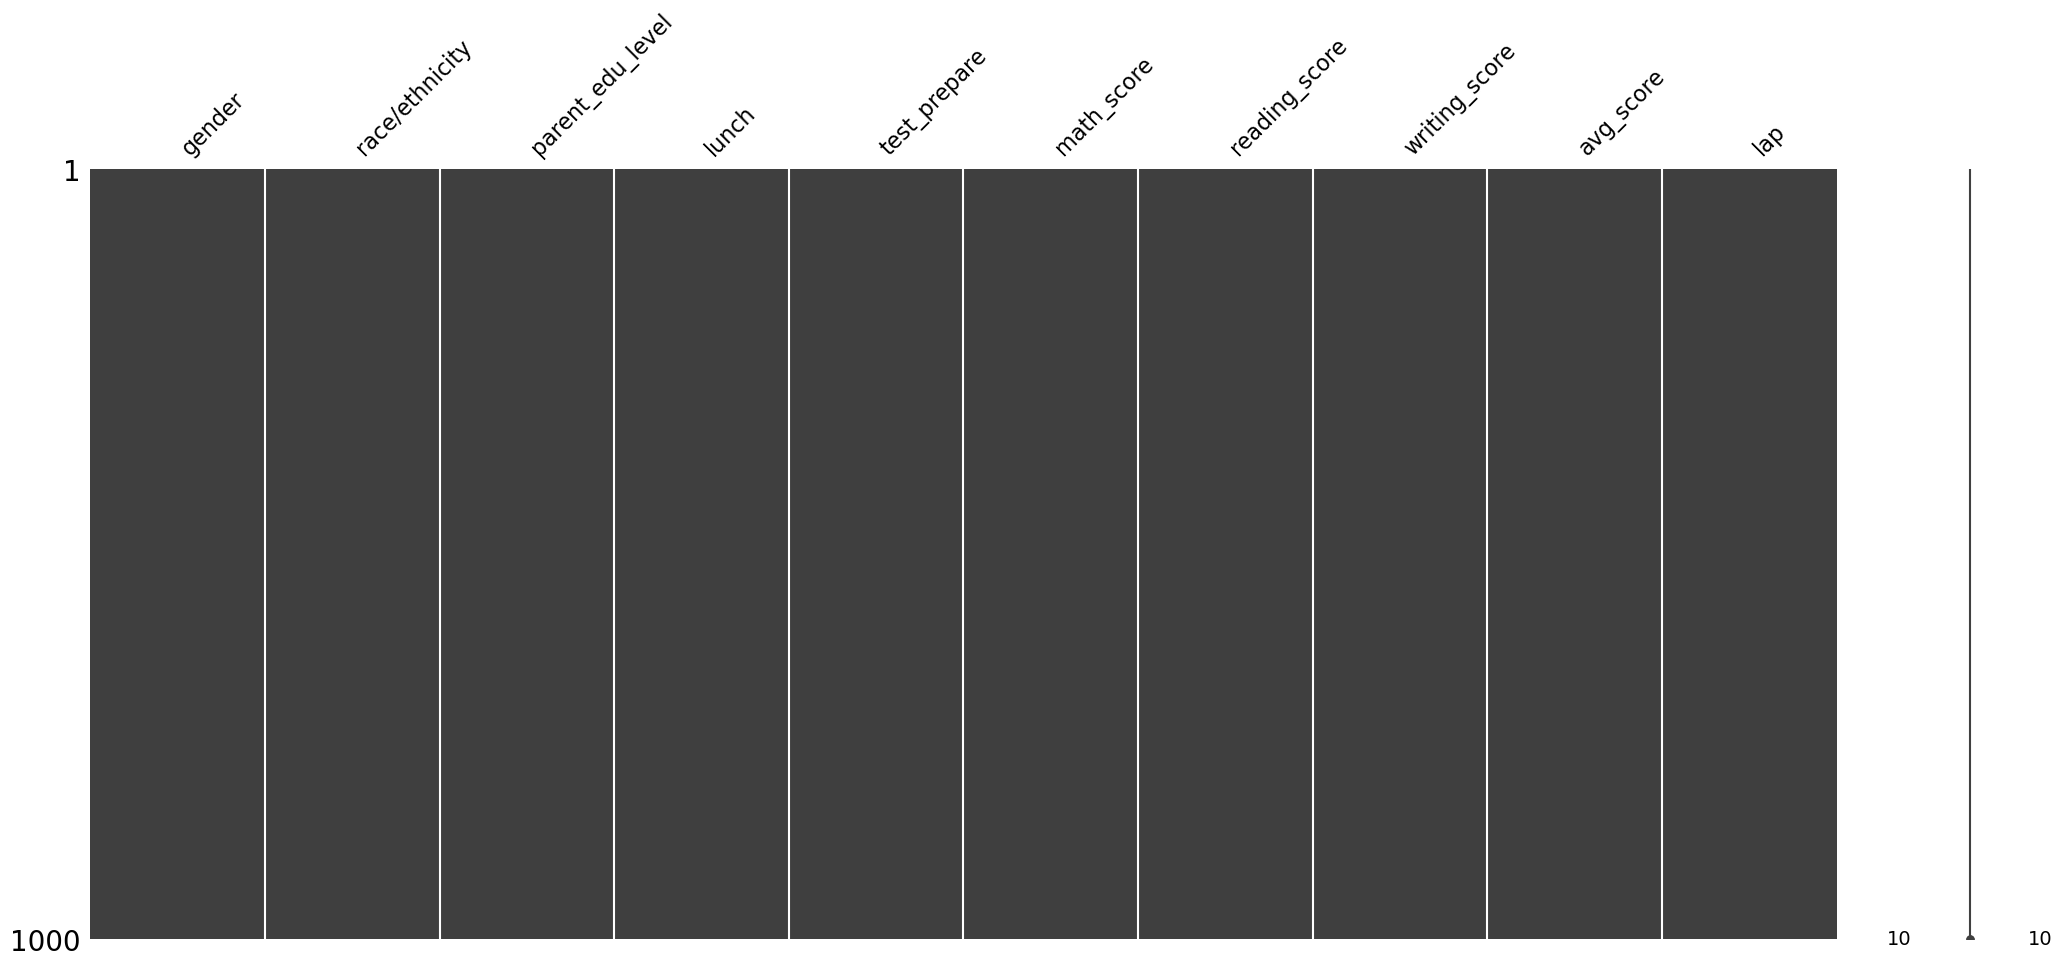

In [28]:
msno.matrix(st_data2)

In [29]:
st_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   gender            1000 non-null   int64
 1   race/ethnicity    1000 non-null   int64
 2   parent_edu_level  1000 non-null   int64
 3   lunch             1000 non-null   int64
 4   test_prepare      1000 non-null   int64
 5   math_score        1000 non-null   int64
 6   reading_score     1000 non-null   int64
 7   writing_score     1000 non-null   int64
 8   avg_score         1000 non-null   int32
 9   lap               1000 non-null   int64
dtypes: int32(1), int64(9)
memory usage: 74.3 KB


In [30]:
st_data2

,gender,race/ethnicity,parent_edu_level,lunch,test_prepare,math_score,reading_score,writing_score,avg_score,lap
0,1,1,3,1,0,72,72,74,72,0
1,1,2,2,1,1,69,90,88,82,1
2,1,1,5,1,0,90,95,93,92,0
3,0,0,4,0,0,47,57,44,49,0
4,0,2,2,1,0,76,78,75,76,0
...,...,...,...,...,...,...,...,...,...,...
995,1,4,5,1,1,88,99,95,94,1
996,0,2,1,0,0,62,55,55,57,0
997,1,2,1,0,1,59,71,65,65,0
998,1,3,2,1,1,68,78,77,74,1


* 이상치 확인

<AxesSubplot:xlabel='avg_score'>

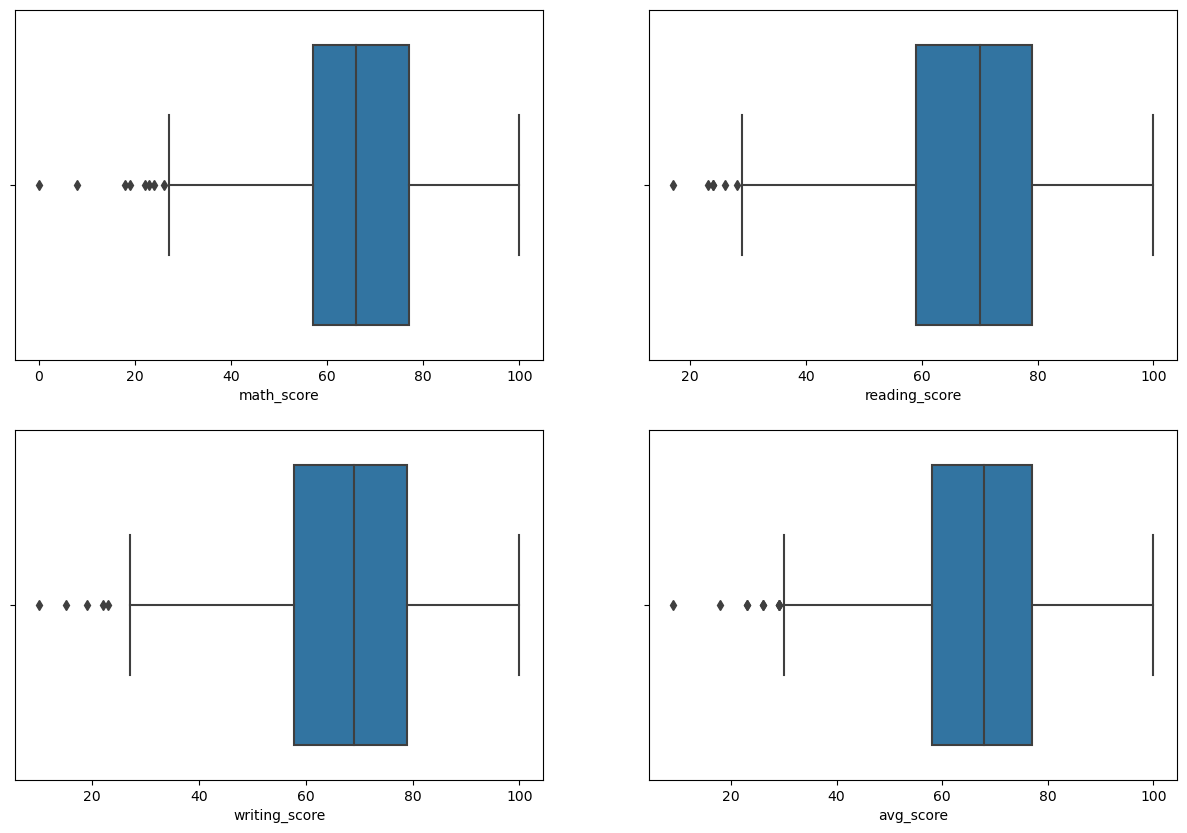

In [31]:
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(15, 10)

sns.boxplot(x = "math_score", data = st_data2, ax=ax1)   #첫번째 칸에 표 삽입
sns.boxplot(x = "reading_score", data = st_data2, ax=ax2)   #두번째 칸에 표 삽입
sns.boxplot(x = "writing_score", data = st_data2, ax=ax3)   #세번째 칸에 표 삽입
sns.boxplot(x = "avg_score", data = st_data2, ax=ax4)   # 네번째 칸에 표 삽입

In [33]:
st_data2.describe()

,gender,race/ethnicity,parent_edu_level,lunch,test_prepare,math_score,reading_score,writing_score,avg_score,lap
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.518000,2.174000,2.185000,0.645000,0.358000,66.08900,69.169000,68.054000,67.445000,0.227000
std,0.499926,1.157179,1.554732,0.478753,0.479652,15.16308,14.600192,15.195657,14.263324,0.419102
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,17.000000,10.000000,9.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,57.00000,59.000000,57.750000,58.000000,0.000000
50%,1.000000,2.000000,2.000000,1.000000,0.000000,66.00000,70.000000,69.000000,68.000000,0.000000
75%,1.000000,3.000000,4.000000,1.000000,1.000000,77.00000,79.000000,79.000000,77.000000,0.000000
max,1.000000,4.000000,5.000000,1.000000,1.000000,100.00000,100.000000,100.000000,100.000000,1.000000


In [34]:
#st_data3 데이터프레임 생성하여 이상치 제거 이후의 데이터 삽입
st_data3 = st_data2[(st_data2["math_score"]>26) & (st_data2["reading_score"]>29)]
st_data3

,gender,race/ethnicity,parent_edu_level,lunch,test_prepare,math_score,reading_score,writing_score,avg_score,lap
0,1,1,3,1,0,72,72,74,72,0
1,1,2,2,1,1,69,90,88,82,1
2,1,1,5,1,0,90,95,93,92,0
3,0,0,4,0,0,47,57,44,49,0
4,0,2,2,1,0,76,78,75,76,0
...,...,...,...,...,...,...,...,...,...,...
995,1,4,5,1,1,88,99,95,94,1
996,0,2,1,0,0,62,55,55,57,0
997,1,2,1,0,1,59,71,65,65,0
998,1,3,2,1,1,68,78,77,74,1


<AxesSubplot:xlabel='avg_score'>

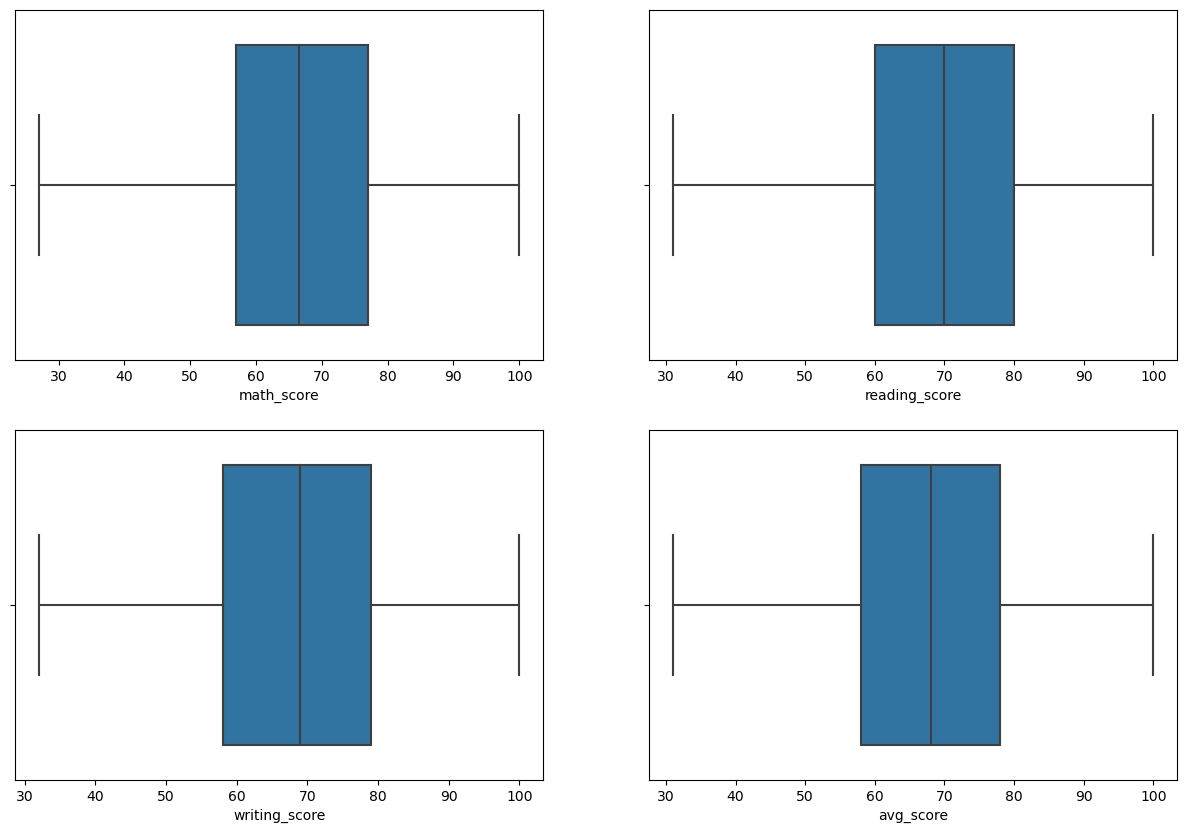

In [35]:
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(15, 10)

sns.boxplot(x = "math_score", data = st_data3, ax=ax1)
sns.boxplot(x = "reading_score", data = st_data3, ax=ax2)
sns.boxplot(x = "writing_score", data = st_data3, ax=ax3)
sns.boxplot(x = "avg_score", data = st_data3, ax=ax4)

# 데이터 시각화

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-p

<AxesSubplot:xlabel='lap', ylabel='count'>

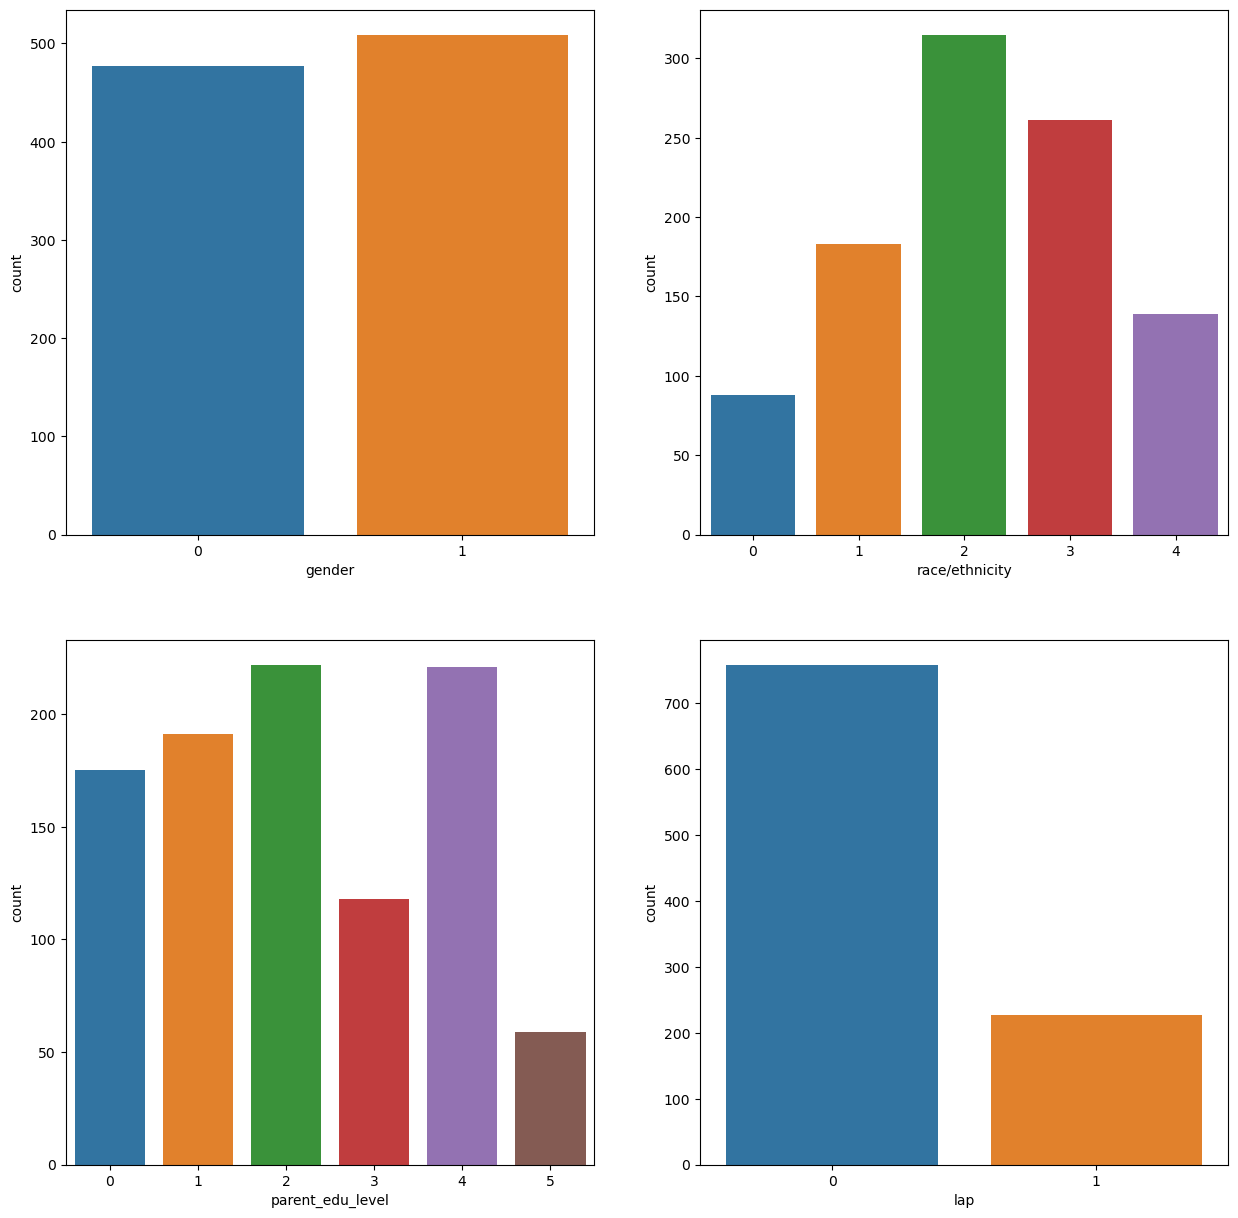

In [36]:
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)	#가로/세로 2칸으로
figure.set_size_inches(15, 15)	#그래프 크기 지정

sns.countplot('gender', data=st_data3, ax=ax1)	#첫번쨰칸 gender 컬럼 그래프
sns.countplot('race/ethnicity', data=st_data3, ax=ax2)	#두번쨰칸 race/ethinicty 컬럼 그래프
sns.countplot('parent_edu_level', data=st_data3, ax=ax3)	#세번쨰칸 parent_edu_level 컬럼 그래프
sns.countplot('lap', data=st_data3, ax=ax4)	#네번쨰칸 lap 컬럼 그래프

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\l

<AxesSubplot:xlabel='lap', ylabel='avg_score'>

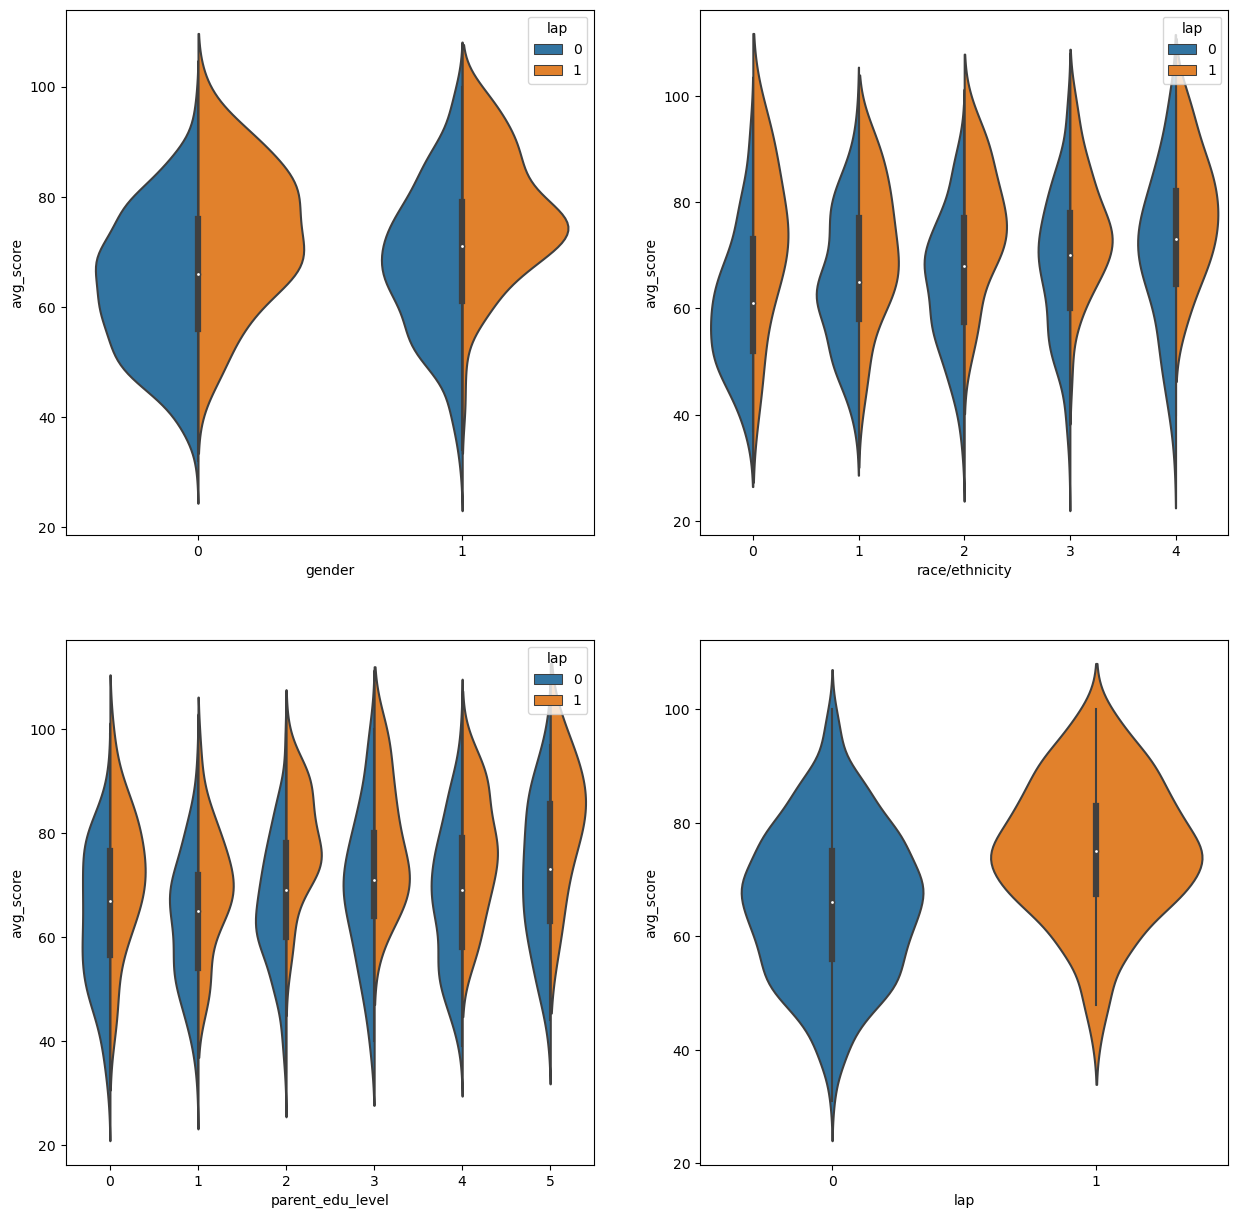

In [37]:
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(15, 15)

sns.violinplot('gender', 'avg_score', hue='lap', split=True, data=st_data3, ax=ax1)
sns.violinplot('race/ethnicity', 'avg_score', hue='lap', split=True, data=st_data3, ax=ax2)
sns.violinplot('parent_edu_level', 'avg_score', hue='lap', split=True, data=st_data3, ax=ax3)
sns.violinplot('lap', 'avg_score', data=st_data3, ax=ax4)

# 통계 또는 머신러닝

In [38]:
#상관관계 파악(상관계수)
corrMatt = st_data3[['gender', 'race/ethnicity', 'parent_edu_level', 'lunch', 'test_prepare', 'math_score', 'reading_score', 'writing_score', 'avg_score', 'lap']]
corrMatt = corrMatt.corr()
corrMatt

,gender,race/ethnicity,parent_edu_level,lunch,test_prepare,math_score,reading_score,writing_score,avg_score,lap
gender,1.000000,0.003648,0.042826,-0.018811,-0.005461,-0.163481,0.267108,0.329214,0.151231,-0.015348
race/ethnicity,0.003648,1.000000,0.097657,0.036425,0.014281,0.208966,0.134255,0.154412,0.175539,0.005332
parent_edu_level,0.042826,0.097657,1.000000,-0.024106,-0.013522,0.132291,0.161775,0.198617,0.173255,-0.040466
lunch,-0.018811,0.036425,-0.024106,1.000000,-0.024123,0.337886,0.208412,0.225033,0.272563,0.400317
test_prepare,-0.005461,0.014281,-0.013522,-0.024123,1.000000,0.164597,0.230529,0.307128,0.247632,0.725911
math_score,-0.163481,0.208966,0.132291,0.337886,0.164597,1.000000,0.798881,0.780668,0.909343,0.260909
reading_score,0.267108,0.134255,0.161775,0.208412,0.230529,0.798881,1.000000,0.949844,0.967328,0.255382
writing_score,0.329214,0.154412,0.198617,0.225033,0.307128,0.780668,0.949844,1.000000,0.961545,0.307898
avg_score,0.151231,0.175539,0.173255,0.272563,0.247632,0.909343,0.967328,0.961545,1.000000,0.290727
lap,-0.015348,0.005332,-0.040466,0.400317,0.725911,0.260909,0.255382,0.307898,0.290727,1.000000


C:\Users\user\AppData\Local\Temp\ipykernel_31732\2789050259.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.zeros_like(corrMatt, dtype=np.bool)


<AxesSubplot:>

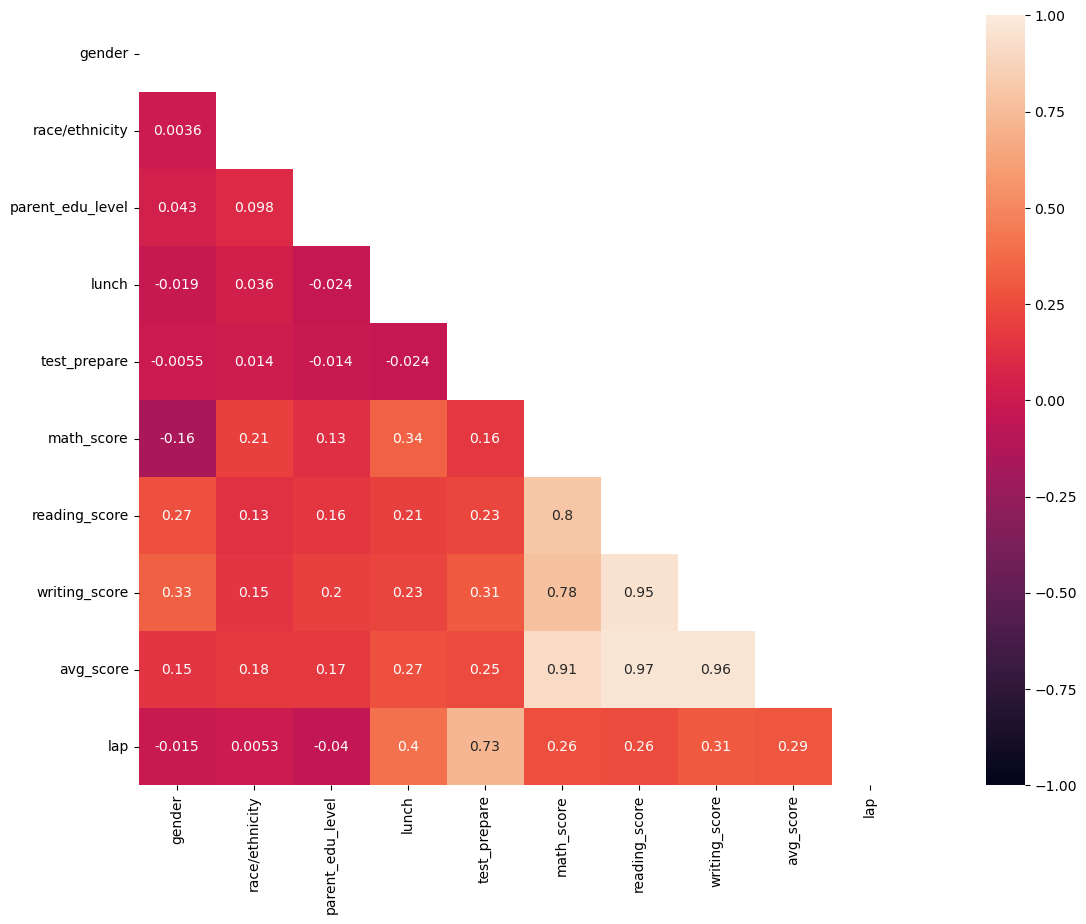

In [39]:
mask=np.zeros_like(corrMatt, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

figure, ax = plt.subplots()
figure.set_size_inches(20, 10)
#vmin값과 vmax값은 -1, 1값으로 지정하여야 보기 좋습니다.
sns.heatmap(corrMatt, mask=mask, vmin=-1, vmax=1, square=True, annot=True)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


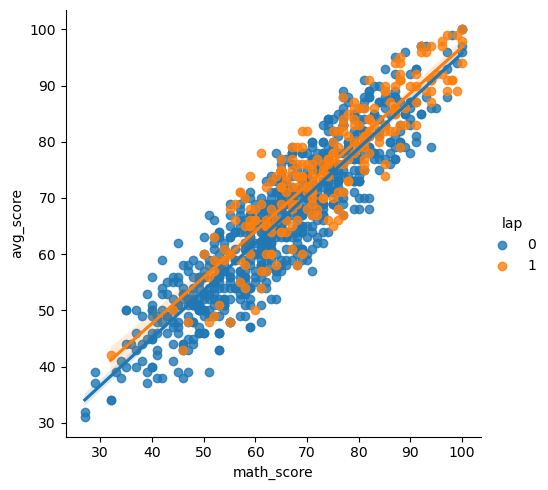

In [40]:
sns.lmplot('math_score', 'avg_score', hue='lap', data=st_data3)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


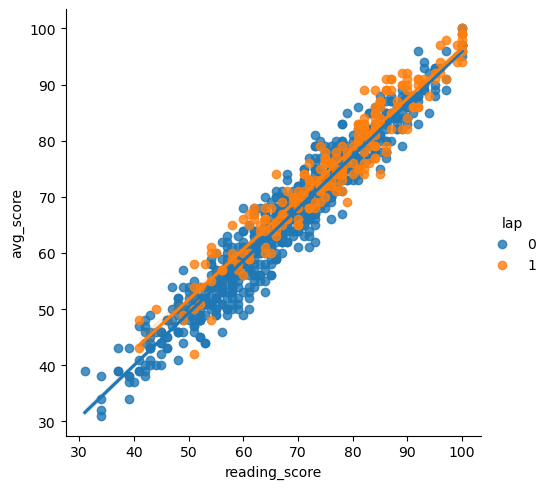

In [41]:
sns.lmplot('reading_score', 'avg_score', hue='lap', data=st_data3)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


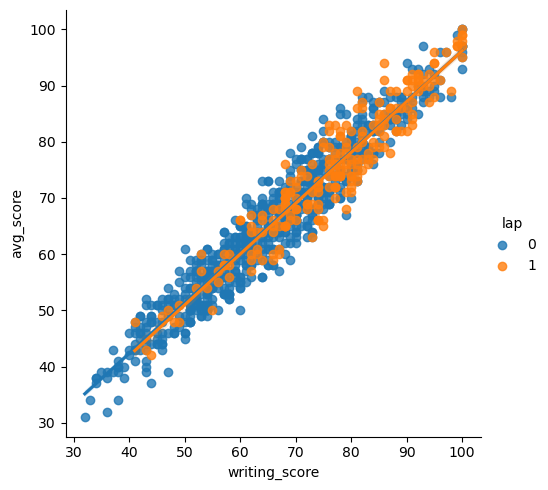

In [42]:
sns.lmplot('writing_score', 'avg_score', hue='lap', data=st_data3)

In [43]:
# 단순선형회귀 모형
import statsmodels.api as sm
st_reg=sm.OLS.from_formula("lap ~ math_score + reading_score + writing_score", st_data3).fit()
st_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    lap   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     42.06
Date:                Thu, 15 Jun 2023   Prob (F-statistic):           1.42e-25
Time:                        00:02:13   Log-Likelihood:                -486.41
No. Observations:                 986   AIC:                             980.8
Df Residuals:                     982   BIC:                             1000.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.3405      0.066     -5.151      0.000      -0.470      -0.211
math_score        0.0035      0.001      2.357      0.019       0.001       0.006
reading_score    -0.0136      0.003     -4.464      0.000      -0.020      -0.008
writing_score     0.0187      0.003      6.633      0.000       0.013       0.024
==============================================================================
Omnibus:                      132.929   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.330
Skew:                           1.039   Prob(JB):                     2.56e-40
Kurtosis:                       2.650   Cond. No.                         631.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. R-square R-square의 값이 0.114이다. R-square 값은 0~1 사이에 있으므로 설명력이 없지 않는 상태이다.

2. 회귀모형 coef 계수를 살펴보면 intercept는 -0.3466, math_score는 0.0036, reading_score는 -0.0130, writing_score는 0.0181이다.

3. P > |t|(유의확률) P > |t|의 값은 전부 0.05보다 작은 값이 나왔고, 이는 math_score, reading_score, writing_score 변수가 lap 변수에 유의미하게 영향을 미친다는 의미이다.

4. Durbin-Watson 검정 Durbin-Watson의 값은 2.044이므로, 1.5~2.5 사이이므로 회귀모형이 적합하다.

5. No.observations No.observations(더빈왓슨, DW검정)값은 971이다. 971개의 데이터 쌍을 가지고 회귀분석을 실시하였다.

6. Df Residuals Df Residuals값은 967이다.

In [44]:
from sklearn import model_selection
from sklearn import metrics
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [45]:
x_data=st_data3.iloc[:, 5:8]
y_data=st_data3.iloc[:,-1]
x_data=x_data.values
y_data=y_data.values

print("x_data ->",x_data)
print("y_data ->", y_data)

x_data -> [[72 72 74]
 [69 90 88]
 [90 95 93]
 ...
 [59 71 65]
 [68 78 77]
 [77 86 86]]
y_data -> [0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0
 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0
 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0
 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 1
 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0
 0

In [46]:
x_train,x_test,y_train,y_test = model_selection.train_test_split(x_data,y_data,test_size=0.3)

In [47]:
# 로지스틱 모델링
estimator=LogisticRegression(penalty='l2',dual=False,tol=0.0001,C=1.0,fit_intercept=True,intercept_scaling=1,class_weight=None,verbose=0,warm_start=False,n_jobs=1)
estimator.fit(x_train,y_train)

LogisticRegression(n_jobs=1)

In [48]:
# train 학습
y_predict = estimator.predict(x_train)
score=metrics.accuracy_score(y_train,y_predict)
print('train score: ',score)

train score:  0.7666666666666667


In [49]:
# test 평가
y_predict = estimator.predict(x_test)
score=metrics.accuracy_score(y_test,y_predict)
print('test score: ',score)

test score:  0.8040540540540541


# 결론

본인 차별화 포인트도 생각해서 써보기

_결론_

- lunch 변수의 그룹 분석으로 알 수 있었던 것은 표준 양으로 밥을 먹었던 학생의 평균 점수가 높다는 것이었다.

- 동시에, test preparation course 변수를 그룹 분석 한 결과, 시험 준비 코스를 했던 학생의 평균 점수가 더 높게 나왔다.

- 그러므로 시험 점수가 높은 학생들은 표준 양의 밥을 먹고, 시험 준비 코스도 하였을 것이라는 예상을 하였고, lunch 변수와 test_prepare(원 이름: test preparation course)변수의 값이 모두 1일때만 1의 값을 가지는 lap 변수를 만들어 내었다.

- 표준 양의 밥을 먹고, 시험 준비 코스를 거친 학생이 점수가 더 높게 나온다는 사실을 시각화에서 확인 할 수 있었다.

- lunch 변수와 test_prepare(원 이름: test preparation course) 변수가 상관관계에서 뚜렷한 상관관계를 나타내었다.

- 로지스틱 회귀 분석을 해본 결과, 73%의 정확도로 시험 점수가 높으면 표준 양의 밥을 먹고, 시험 준비(연습) 코스를 한 학생일 가능성이 높다는 예측을 이루어 내었다.
- 이상치 데이터를 좀 더 조절하면 정확도가 더 높게 나올것으로 예상된다.

- 시험을 잘 본 학생들은 대체로 표준 양의 밥을 먹고, 시험 준비 코스도 하였다.

- 그렇기 때문에, 밥도 잘먹고, 시험 준비도 잘해야 좋은 점수를 받을 가능성이 있다.